
Short guide to the flag algebra package
=======================================

Contents:
1. Quick start
2. Flags
    1. Creating flags
    2. Everything is induced
    3. Operations over flags
    4. Types
    5. Patterns
3. Theories
    1. Already present theories
    4. Creating new theories
    2. Excluding things
    3. Generating things
    5. Combining theories
4. Optimizing
    1. Assumptions
    2. Rounding
    3. Construction
    4. Certificates
    6. Exporting the SDP problem
    8. Rounding over field extensions
5. Miscallenous

Quick start
===========

Here Mantel's theorem will be demonstrated

In [1]:
# Check Mantel's theorem

# Define a triangle
triangle = GraphTheory(3, edges=[[0, 1], [0, 2], [1, 2]])

# Define an edge
edge = GraphTheory(2, edges=[[0, 1]])

# Exclude triangles
GraphTheory.exclude(triangle)
# Maximize edges, calculate up to size 3, make the result exact
GraphTheory.optimize(edge, 3, maximize=True, exact=True)

Base flags generated, their number is 3
The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [2]


Done with mult table for Ftype on 1 points with edges=(): : 1it [00:00, 497.07it/s]

Tables finished
Constraints finished
Running sdp without construction. Used block sizes are [2, -3, -2]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.5751371e+01 Ad: 7.93e-01 Dobj: -1.8596991e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.3829292e+01 Ad: 9.44e-01 Dobj: -2.5639377e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -3.6548137e+00 Ad: 9.22e-01 Dobj: -2.8097573e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -6.7094195e-01 Ad: 8.42e-01 Dobj: -3.1080901e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -5.8576089e-01 Ad: 8.47e-01 Dobj: -4.8072710e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -5.0662032e-01 Ad: 8.78e-01 Dobj: -4.9275677e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -5.0069959e-01 Ad: 9.33e-01 Dobj: -4.9911657e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -5.0005821e-01 Ad: 1.00e+00 Dobj: -4.9996202e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -5.0000265e-01 Ad: 1.00e+00 Dobj: -4.9999892e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -5.0000020e-01 Ad: 1.00e+00 Dobj: -4.9999999e-01 
Iter: 11 Ap: 1.00e+00 Pobj: -5.0000001e-01 Ad: 9.90e-01 Dobj: -5.0000000e-01 
Iter: 12 Ap: 9.57e-01 Pobj: -5.0000000e-01 Ad: 9.69e-

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 250.54it/s]

This took 0.009990453720092773s
Final rounded bound is 1/2


1/2

In [2]:
# Python syntax
# For short, use G for GraphTheory
G = GraphTheory

Flags
=====

1. Creating flags
2. Everything is induced
3. Operations with flags
4. Types
5. Patterns

In [3]:
###
### Creating flags
###

# To create a flag, write TheoryName(size, relation_name=...)

# Example for graphs
triangle = G(3, edges=[[0, 1], [0, 2], [1, 2]])
cherry = G(3, edges=[[0, 1], [0, 2]])
# Example for three graphs
k4m = ThreeGraphTheory(4, edges=[[0, 1, 2], [0, 1, 3], [1, 2, 3]])

# Note automorphism doesn't matter
other_cherry = G(3, edges=[[0, 1], [2, 1]])
print("Is cherry the same as other cherry? ", cherry==other_cherry)

# Flags can be printed
print("Triangle flag is: ", triangle)

# If a relation is not included, it is assumed to be empty
test = G(3)
print("The test flag is ", test)

Is cherry the same as other cherry?  True
Triangle flag is:  Flag on 3 points, ftype from () with edges=(01 02 12)
The test flag is  Flag on 3 points, ftype from () with edges=()


In [4]:
###
### Everything is induced
###

# Note that everything is induced. Mantel's theorem can be checked with the complements

G.reset()
G.exclude(G(3))
G.optimize(G(2), 3)

Base flags generated, their number is 3
The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [2]


Done with mult table for Ftype on 1 points with edges=(): : 1it [00:00,  9.70it/s]

Tables finished
Constraints finished
Running sdp without construction. Used block sizes are [2, -3, -2]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.5751371e+01 Ad: 7.93e-01 Dobj: -1.8596991e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.3829292e+01 Ad: 9.44e-01 Dobj: -2.5639377e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -3.6548137e+00 Ad: 9.22e-01 Dobj: -2.8097573e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -6.7101882e-01 Ad: 8.42e-01 Dobj: -3.1080817e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -5.8576221e-01 Ad: 8.44e-01 Dobj: -4.8002517e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -5.0647693e-01 Ad: 8.85e-01 Dobj: -4.9296282e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -5.0060021e-01 Ad: 9.41e-01 Dobj: -4.9923796e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -5.0005080e-01 Ad: 1.00e+00 Dobj: -4.9996691e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -5.0000234e-01 Ad: 1.00e+00 Dobj: -4.9999913e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -5.0000016e-01 Ad: 1.00e+00 Dobj: -5.0000000e-01 
Iter: 11 Ap: 9.58e-01 Pobj: -5.0000001e-01 Ad: 9.70e-01 Dobj: -5.0000000e-01 
Success: SDP solved
Primal objective value: -5.000000

0.5000000069458745

In [5]:
###
### Operations with flags
###


G.reset()
empty3 = G(3)
# Addition, Multiplication
empty3 + cherry, G(2)*G(2)

(Flag Algebra Element over Rational Field
 1 - Flag on 3 points, ftype from () with edges=()
 0 - Flag on 3 points, ftype from () with edges=(01)
 1 - Flag on 3 points, ftype from () with edges=(01 02)
 0 - Flag on 3 points, ftype from () with edges=(01 02 12),
 Flag Algebra Element over Rational Field
 1   - Flag on 4 points, ftype from () with edges=()
 2/3 - Flag on 4 points, ftype from () with edges=(01)
 1/3 - Flag on 4 points, ftype from () with edges=(01 03)
 2/3 - Flag on 4 points, ftype from () with edges=(02 13)
 1/3 - Flag on 4 points, ftype from () with edges=(01 02 13)
 1/3 - Flag on 4 points, ftype from () with edges=(02 03 12 13))

In [6]:
# Chain rule, increase size by 1
k2 = G(2, edges=[[0, 1]])
# Increase size with << operator
k2 << 2

Flag Algebra Element over Rational Field
1/6 - Flag on 4 points, ftype from () with edges=(01)
1/3 - Flag on 4 points, ftype from () with edges=(01 03)
1/3 - Flag on 4 points, ftype from () with edges=(02 13)
1/2 - Flag on 4 points, ftype from () with edges=(01 02 03)
1/2 - Flag on 4 points, ftype from () with edges=(01 03 13)
1/2 - Flag on 4 points, ftype from () with edges=(01 02 13)
2/3 - Flag on 4 points, ftype from () with edges=(01 02 03 13)
2/3 - Flag on 4 points, ftype from () with edges=(02 03 12 13)
5/6 - Flag on 4 points, ftype from () with edges=(01 02 03 12 13)
1   - Flag on 4 points, ftype from () with edges=(01 02 03 12 13 23)

In [7]:
###
### Types
###

# Add ftype=[] list of points to define the marked vertices, when creating a flag
pointed_edge = G(2, edges=[[0, 1]], ftype=[0])
pointed_edge

Flag on 2 points, ftype from (0,) with edges=(01)

In [8]:
# Types must map to types (with the same order)

fl0 = G(3, edges=[[0, 1]], ftype=[0, 2])
fl1 = G(3, edges=[[0, 1]], ftype=[2, 0])
fl2 = G(3, edges=[[0, 1]], ftype=[2])
fl0==fl1, fl0==fl2, fl1==fl2

(False, False, False)

In [9]:
# Operations still work
pointed_cherry = G(3, edges=[[0, 1], [1, 2]], ftype=[1])
print(pointed_edge + pointed_cherry)
print(pointed_edge*pointed_edge)

Flag Algebra Element over Rational Field
0   - Flag on 3 points, ftype from (0,) with edges=()
1/2 - Flag on 3 points, ftype from (0,) with edges=(01)
0   - Flag on 3 points, ftype from (2,) with edges=(01)
2   - Flag on 3 points, ftype from (0,) with edges=(01 02)
1/2 - Flag on 3 points, ftype from (1,) with edges=(01 02)
1   - Flag on 3 points, ftype from (0,) with edges=(01 02 12)
Flag Algebra Element over Rational Field
0 - Flag on 3 points, ftype from (0,) with edges=()
0 - Flag on 3 points, ftype from (0,) with edges=(01)
0 - Flag on 3 points, ftype from (2,) with edges=(01)
1 - Flag on 3 points, ftype from (0,) with edges=(01 02)
0 - Flag on 3 points, ftype from (1,) with edges=(01 02)
1 - Flag on 3 points, ftype from (0,) with edges=(01 02 12)


In [10]:
# The averaging operator, called project here
pointed_cherry.project()

Flag Algebra Element over Rational Field
0   - Flag on 3 points, ftype from () with edges=()
0   - Flag on 3 points, ftype from () with edges=(01)
1/3 - Flag on 3 points, ftype from () with edges=(01 02)
0   - Flag on 3 points, ftype from () with edges=(01 02 12)

In [11]:
# To create a type, simply create a flag with all vertices marked as type
edgetype = G(2, edges=[[0, 1]], ftype=[0, 1])
edgetype

Ftype on 2 points with edges=(01)

In [12]:
###
### Patterns
###

# A pattern is a non-induced flag. Every relation is optional, unless stated otherwise.

# This induced graph has 3 points and an edge.
edge3 = G(3, edges=[[0, 1]])
# This pattern is the same, but non-induced.
pat3 = G.pattern(3, edges=[[0, 1]])

# To see the list of induced flags compatible with this patter, call
pat3.compatible_flags()

[Flag on 3 points, ftype from () with edges=(01),
 Flag on 3 points, ftype from () with edges=(01 02),
 Flag on 3 points, ftype from () with edges=(01 02 12)]

In [13]:
# A pattern can have strictly missing relations too. We can specify by listing them with the _missing or _m suffix

# This pattern on 3 points must have one edge present and one edge missing
mpat3 = G.pattern(3, edges=[[0, 1]], edges_missing=[[1, 2]])
mpat3.compatible_flags()

[Flag on 3 points, ftype from () with edges=(01),
 Flag on 3 points, ftype from () with edges=(01 02)]

In [14]:
# When a pattern is used in an expression, it is just converted to the sum of it's elements

edge + mpat3

Flag Algebra Element over Rational Field
0   - Flag on 3 points, ftype from () with edges=()
4/3 - Flag on 3 points, ftype from () with edges=(01)
5/3 - Flag on 3 points, ftype from () with edges=(01 02)
1   - Flag on 3 points, ftype from () with edges=(01 02 12)

In [15]:
# Patterns can be created with the shorted .p
# Also instead of adding _missing, it is enough to add _m
G.reset()
# 5 points, has a triangle and a missing triangle.
test = G.p(5, edges=[[0, 1], [1, 2], [0, 2]], edges_m=[[2, 3], [3, 4], [2, 4]])
test.compatible_flags()

[Flag on 5 points, ftype from () with edges=(01 04 14),
 Flag on 5 points, ftype from () with edges=(01 03 04 14),
 Flag on 5 points, ftype from () with edges=(01 02 03 04 14),
 Flag on 5 points, ftype from () with edges=(01 03 04 12 14),
 Flag on 5 points, ftype from () with edges=(01 02 04 12 14),
 Flag on 5 points, ftype from () with edges=(01 02 03 04 12 14),
 Flag on 5 points, ftype from () with edges=(01 02 03 04 12 13 14)]

Theories
========

1. Already present theories
4. Creating new theories
2. Excluding things
3. Generating things
5. Combining theories

In [16]:
###
### Already present theories
###

# The following theories are already created, the names are self explanatory

GraphTheory = Theory("Graph")
DiGraphTheory = Theory("DiGraph", arity=2, is_ordered=True)
ThreeGraphTheory = Theory("ThreeGraph", arity=3)
DiThreeGraphTheory = Theory("DiThreeGraph", arity=3, is_ordered=True)
FourGraphTheory = Theory("FourGraph", arity=4)
Color0 = Theory("Color0", relation_name="C0", arity=1)
Color1 = Theory("Color1", relation_name="C1", arity=1)
Color2 = Theory("Color2", relation_name="C2", arity=1)
Color3 = Theory("Color3", relation_name="C3", arity=1)
Color4 = Theory("Color4", relation_name="C4", arity=1)
Color5 = Theory("Color5", relation_name="C5", arity=1)
Color6 = Theory("Color6", relation_name="C6", arity=1)
Color7 = Theory("Color7", relation_name="C7", arity=1)

In [17]:
DiGraphTheory.exclude(DiGraphTheory(2, edges=[[0, 1], [1, 0]]))

In [19]:
###
### Creating new theories
###

# One can create a new theory using the command:
# Theory(["name_for_the_theory"], relation_name=["name_for_the_relation"], arity=[arity_of_relation], is_ordered=[is_relation_ordered])

# The default values are: relation_name="edges", arity=2, is_orderd=False
# Here are a few examples

OtherDiGraphTheory = Theory("OtherDiGraph", arity=2, is_ordered=True, relation_name="diedge")
OtherThreeGraphTheory = Theory("OtherThreeGraph", arity=3, relation_name="edges3")

# The elements in the new theory has relations named accordingly
print(OtherThreeGraphTheory.generate(3))

# And creating elements must also follow the convention
k4m = OtherThreeGraphTheory(4, edges3=[[0, 1, 2], [1, 2, 3], [0, 2, 3]])
k4m

(Flag on 3 points, ftype from () with edges3=(), Flag on 3 points, ftype from () with edges3=(012))


Flag on 4 points, ftype from () with edges3=(012 023 123)

In [20]:
###
### Excluding things
###

# To reset a theory, so nothing is excluded, call
G.reset()

# A list of flags can be excluded
structure_1 = G(4, edges=[[0, 1], [0, 2], [0, 3], [1, 2]])
structure_2 = G(3, edges=[[0, 1], [0, 2]])
G.exclude([structure_1, structure_2])

# Exclude works incrementally, the following works too
G.reset()
G.exclude(structure_1)
G.exclude(structure_2)

# Excluding also allows patterns, 
G.reset()
G.exclude(G.p(4, edges=[[0, 1], [1, 2], [2, 3], [0, 2]]))

In [21]:
###
### Generating flags
###

# To generate all flags (respecting the excluded structures, see the above cell)
G.generate(4)

(Flag on 4 points, ftype from () with edges=(),
 Flag on 4 points, ftype from () with edges=(01),
 Flag on 4 points, ftype from () with edges=(01 03),
 Flag on 4 points, ftype from () with edges=(02 13),
 Flag on 4 points, ftype from () with edges=(01 02 03),
 Flag on 4 points, ftype from () with edges=(01 03 13),
 Flag on 4 points, ftype from () with edges=(01 02 13),
 Flag on 4 points, ftype from () with edges=(02 03 12 13))

In [22]:
# It is also possible to generate all flags with a given type
edgetype = G(2, edges=[[0, 1]], ftype=[0, 1])
G.reset()
G.generate(4, edgetype)

(Flag on 4 points, ftype from (0, 1) with edges=(01),
 Flag on 4 points, ftype from (0, 1) with edges=(01 03),
 Flag on 4 points, ftype from (1, 0) with edges=(01 03),
 Flag on 4 points, ftype from (0, 2) with edges=(02 13),
 Flag on 4 points, ftype from (0, 1) with edges=(01 02 03),
 Flag on 4 points, ftype from (1, 0) with edges=(01 02 03),
 Flag on 4 points, ftype from (0, 1) with edges=(01 03 13),
 Flag on 4 points, ftype from (0, 1) with edges=(01 02 13),
 Flag on 4 points, ftype from (0, 2) with edges=(01 02 13),
 Flag on 4 points, ftype from (2, 0) with edges=(01 02 13),
 Flag on 4 points, ftype from (0, 1) with edges=(01 02 03 13),
 Flag on 4 points, ftype from (0, 2) with edges=(01 02 03 13),
 Flag on 4 points, ftype from (1, 0) with edges=(01 02 03 13),
 Flag on 4 points, ftype from (1, 3) with edges=(01 02 03 13),
 Flag on 4 points, ftype from (2, 0) with edges=(01 02 03 13),
 Flag on 4 points, ftype from (0, 2) with edges=(02 03 12 13),
 Flag on 4 points, ftype from (0, 1) 

In [23]:
#this gives error, both uses the edges relation name
combine("CombinedThing", GraphTheory, ThreeGraphTheory)

ValueError: The relation names must be different!

In [24]:
# To create complex theories, it is possible to combine them.

# For this to work, the theories must have different relation_name-s

# We can't combine GraphTheory and ThreeGraphTheory since they both use the "edges" relation
# So let's create an alternative ThreeGraphTheory using edges3 relation

TG = Theory("OtherThreeGraph", arity=3, relation_name="edges3")

# Then we can combine the theories
# First a name is needed, then the list of theories
G.reset()
G.exclude(G(3))
CombinedTheory = combine("TwoThreeGraph", G, TG)
CombinedTheory.reset()
CombinedTheory.generate(3)

(Flag on 3 points, ftype from () with edges=(01), edges3=(),
 Flag on 3 points, ftype from () with edges=(01), edges3=(012),
 Flag on 3 points, ftype from () with edges=(01 02), edges3=(),
 Flag on 3 points, ftype from () with edges=(01 02), edges3=(012),
 Flag on 3 points, ftype from () with edges=(01 02 12), edges3=(),
 Flag on 3 points, ftype from () with edges=(01 02 12), edges3=(012))

In [25]:
G.reset()
CombinedTheory.generate(3)

(Flag on 3 points, ftype from () with edges=(), edges3=(),
 Flag on 3 points, ftype from () with edges=(), edges3=(012),
 Flag on 3 points, ftype from () with edges=(01), edges3=(),
 Flag on 3 points, ftype from () with edges=(01), edges3=(012),
 Flag on 3 points, ftype from () with edges=(01 02), edges3=(),
 Flag on 3 points, ftype from () with edges=(01 02), edges3=(012),
 Flag on 3 points, ftype from () with edges=(01 02 12), edges3=(),
 Flag on 3 points, ftype from () with edges=(01 02 12), edges3=(012))

In [26]:
# For combined theories, we can create flags by specifying the relations separately
test_flag = CombinedTheory(3, edges=[[0, 1], [0, 2]], edges3=[[0, 1, 2]])

# Patterns work too
test_pattern = CombinedTheory.p(4, edges=[[0, 1]], edges_m=[[1, 2]], edges3=[[0, 1, 2]], edges3_m=[[1, 2, 3]])

# See what happens if we exclude these
CombinedTheory.exclude([test_flag, test_pattern])
CombinedTheory.generate(4)

(Flag on 4 points, ftype from () with edges=(), edges3=(),
 Flag on 4 points, ftype from () with edges=(), edges3=(012),
 Flag on 4 points, ftype from () with edges=(), edges3=(012 013),
 Flag on 4 points, ftype from () with edges=(), edges3=(012 013 023),
 Flag on 4 points, ftype from () with edges=(), edges3=(012 013 023 123),
 Flag on 4 points, ftype from () with edges=(02), edges3=(),
 Flag on 4 points, ftype from () with edges=(23), edges3=(012),
 Flag on 4 points, ftype from () with edges=(23), edges3=(012 013),
 Flag on 4 points, ftype from () with edges=(23), edges3=(012 013 023),
 Flag on 4 points, ftype from () with edges=(02), edges3=(012 013 023 123),
 Flag on 4 points, ftype from () with edges=(02 03), edges3=(),
 Flag on 4 points, ftype from () with edges=(13 23), edges3=(012),
 Flag on 4 points, ftype from () with edges=(13 23), edges3=(012 013 023),
 Flag on 4 points, ftype from () with edges=(01 23), edges3=(),
 Flag on 4 points, ftype from () with edges=(01 23), edges

In [27]:
# If the relations combined have the same arity, all ordered or all unordered
# Then a symmetry can be specified

Gp = Theory("OtherGraph", relation_name="oedges")

# By default there is no symmetry. If we omit symmetries, then no symmetry is assumed
Test1 = combine("DoubleEdgeGraph", G, Gp, symmetries=NoSymmetry)
Test2 = combine("SymmetricDoubleEdgeGraph", G, Gp, symmetries=FullSymmetry)


print("Without symmetry, we have the structures: ")
print("\n".join(map(str, Test1.generate(2))))
print("\n\nWith symmetry, we have the structures: ")
print("\n".join(map(str, Test2.generate(2))))
# Note that as the edges and other edges are identical in the second case, 
# the flag with only one of these present is included only once

Without symmetry, we have the structures: 
Flag on 2 points, ftype from () with edges=(), oedges=()
Flag on 2 points, ftype from () with edges=(), oedges=(01)
Flag on 2 points, ftype from () with edges=(01), oedges=()
Flag on 2 points, ftype from () with edges=(01), oedges=(01)


With symmetry, we have the structures: 
Flag on 2 points, ftype from () with edges=(), oedges=()
Flag on 2 points, ftype from () with edges=(), oedges=(01)
Flag on 2 points, ftype from () with edges=(01), oedges=(01)


In [28]:
# For colors, there are pre-defined theories with different names.
# There are also pre-defined symmetry groups.

Cyclic5Colors = combine("Cyclic5Colors", Color0, Color1, Color2, Color3, Color4, symmetries=CyclicSymmetry(5))
Cyclic5Colors.exclude([
    Cyclic5Colors(1), 
    Cyclic5Colors.p(1, C0=[0], C1=[0]),
    Cyclic5Colors.p(1, C0=[0], C2=[0])
])


# There is also a symmetry for the k4m colors
NoK4mColors = combine("NoK4mColors", Color0, Color1, Color2, Color3, Color4, Color5, symmetries=K4mSymmetry)

# Then, these can be combined with other theories.
TT = combine("Cyclic5ColoredGraphs", G, Cyclic5Colors)

In [29]:
TT.generate(3)

(Flag on 3 points, ftype from () with edges=(), C0=(), C1=(), C2=(), C3=(), C4=(0 1 2),
 Flag on 3 points, ftype from () with edges=(), C0=(), C1=(), C2=(), C3=(0), C4=(1 2),
 Flag on 3 points, ftype from () with edges=(), C0=(), C1=(), C2=(0), C3=(), C4=(1 2),
 Flag on 3 points, ftype from () with edges=(), C0=(), C1=(0), C2=(), C3=(), C4=(1 2),
 Flag on 3 points, ftype from () with edges=(), C0=(0), C1=(), C2=(), C3=(), C4=(1 2),
 Flag on 3 points, ftype from () with edges=(), C0=(), C1=(), C2=(0), C3=(1), C4=(2),
 Flag on 3 points, ftype from () with edges=(), C0=(), C1=(0), C2=(), C3=(1), C4=(2),
 Flag on 3 points, ftype from () with edges=(01), C0=(), C1=(), C2=(), C3=(), C4=(0 1 2),
 Flag on 3 points, ftype from () with edges=(01), C0=(), C1=(), C2=(), C3=(0), C4=(1 2),
 Flag on 3 points, ftype from () with edges=(12), C0=(), C1=(), C2=(), C3=(0), C4=(1 2),
 Flag on 3 points, ftype from () with edges=(01), C0=(), C1=(), C2=(0), C3=(), C4=(1 2),
 Flag on 3 points, ftype from () wi

In [30]:
# Altough the exclusion can happen in the combined theories, 
# it is also possible to exclude before combining. 
# In that case, the exclusions at the moment they are combined are used.

# Here is an example where Colors are combined, but they are forced to be disjoint first
Cyclic3Colors = combine("Cyclic3Colors", Color0, Color1, Color2, symmetries=CyclicSymmetry(3))
# This guarantees the colors are disjoint (due to the symmetry)
Cyclic3Colors.exclude([
    Cyclic3Colors(1), 
    Cyclic3Colors.p(1, C0=[0], C1=[0])
])

# Make graphs without empty triples
G.exclude(G(3))

Cyclic3ColGraph = combine("Cyclic3Graph", Cyclic3Colors, G)
# So the resulting theory uses disjoint colors and has no empty graphs
Cyclic3ColGraph.generate(3)

# Note the changing the excluded structures in a component will change the
# excluded structures in the result too, even after the combination.

# Running the below would give a different result as above.
# G.reset()
# Cyclic3ColGraph.generate(3)

(Flag on 3 points, ftype from () with C0=(), C1=(), C2=(0 1 2), edges=(01),
 Flag on 3 points, ftype from () with C0=(), C1=(), C2=(0 1 2), edges=(01 02),
 Flag on 3 points, ftype from () with C0=(), C1=(), C2=(0 1 2), edges=(01 02 12),
 Flag on 3 points, ftype from () with C0=(), C1=(0), C2=(1 2), edges=(01),
 Flag on 3 points, ftype from () with C0=(), C1=(2), C2=(0 1), edges=(01),
 Flag on 3 points, ftype from () with C0=(), C1=(0), C2=(1 2), edges=(01 02),
 Flag on 3 points, ftype from () with C0=(), C1=(1), C2=(0 2), edges=(01 02),
 Flag on 3 points, ftype from () with C0=(), C1=(0), C2=(1 2), edges=(01 02 12),
 Flag on 3 points, ftype from () with C0=(0), C1=(), C2=(1 2), edges=(01),
 Flag on 3 points, ftype from () with C0=(2), C1=(), C2=(0 1), edges=(01),
 Flag on 3 points, ftype from () with C0=(0), C1=(), C2=(1 2), edges=(01 02),
 Flag on 3 points, ftype from () with C0=(1), C1=(), C2=(0 2), edges=(01 02),
 Flag on 3 points, ftype from () with C0=(0), C1=(), C2=(1 2), edges=(

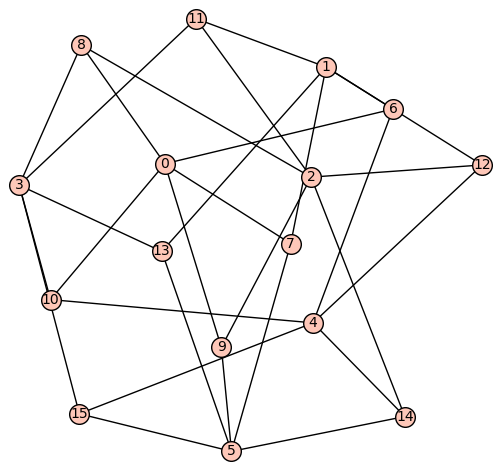

In [31]:
Graph(K4mSymmetry).plot()

In [32]:
# To specify any symmetry, we can provide a symmetry graph

# For this example, I will just recreate the cyclic 3 symmetry.
# To provide cyclic 3 symmetry, we need a graph, where supposing that the first 3 vertices
# are mapped to the first 3 vertices, the automorphism group of those 3 vertices is C3

# The graph with the following edge set works:
Cyclic3 = [[0, 1], [0, 3],[0, 6],
           [3, 7], [0, 7], [1, 2],
           [1, 4], [1, 7], [4, 8],
           [1, 8], [2, 0], [2, 5],
           [2, 8], [5, 6], [2, 6]]

# Therefore it is possible to use it in later inputs
combine("Cyclic3ColorsOther", Color0, Color1, Color2, symmetries=Cyclic3)

Theory for Cyclic3ColorsOther

Optimizing
==========
1. Assumptions
2. Rounding
3. Construction
4. Certificates
6. Exporting the SDP problem
8. Rounding over field extensions

In [33]:
# To run the optimizer, we can call the .optimize function on a theory

G.reset()
G.exclude(triangle)

# The basic requirement is to have a target we optimize for, and a target size
# By default it maximizes, here edges and target size is 3
G.optimize(edge, 3)

Base flags generated, their number is 3
The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [2]


Done with mult table for Ftype on 1 points with edges=(): : 1it [00:00, 345.81it/s]

Tables finished
Constraints finished
Running sdp without construction. Used block sizes are [2, -3, -2]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.5751371e+01 Ad: 7.93e-01 Dobj: -1.8596991e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.3829292e+01 Ad: 9.44e-01 Dobj: -2.5639377e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -3.6548137e+00 Ad: 9.22e-01 Dobj: -2.8097573e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -6.7094195e-01 Ad: 8.42e-01 Dobj: -3.1080901e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -5.8576089e-01 Ad: 8.47e-01 Dobj: -4.8072710e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -5.0662032e-01 Ad: 8.78e-01 Dobj: -4.9275677e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -5.0069959e-01 Ad: 9.33e-01 Dobj: -4.9911657e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -5.0005821e-01 Ad: 1.00e+00 Dobj: -4.9996202e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -5.0000265e-01 Ad: 1.00e+00 Dobj: -4.9999892e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -5.0000020e-01 Ad: 1.00e+00 Dobj: -4.9999999e-01 
Iter: 11 Ap: 1.00e+00 Pobj:

0.5000000004275388

In [34]:
# The target function can be any liner combination of flags
G.optimize(edge + G(3, edges=[[0, 1]]), 4)

Base flags generated, their number is 7
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 3]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00,  7.93it/s]


Tables finished
Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 2, 1, -7, -2]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.8806565e+01 Ad: 7.54e-01 Dobj: -6.9981849e-02 
Iter:  2 Ap: 1.00e+00 Pobj: -1.8408806e+01 Ad: 9.44e-01 Dobj: -5.3423421e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -8.9956342e+00 Ad: 8.73e-01 Dobj: -5.3133258e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.7394355e+00 Ad: 7.87e-01 Dobj: -5.3695578e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -9.4703414e-01 Ad: 8.73e-01 Dobj: -5.5895310e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -7.4536200e-01 Ad: 8.81e-01 Dobj: -6.3958028e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -6.7883373e-01 Ad: 8.58e-01 Dobj: -6.5988123e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -6.6776858e-01 Ad: 9.34e-01 Dobj: -6.6583853e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -6.6674852e-01 Ad: 9.94e-01 Dobj: -6.6663187e-01 
Iter: 10 Ap: 9.81e-01 Pobj: -6.6667197e-01 Ad: 1.00e+00 Dobj: -6.6666778e-01 
Iter: 11 Ap: 1.00e

0.6666666672726256

In [35]:
###
### Assumptions
###

# It is possible to add assumptions to the optimizer. 
# Any linear combination of flags included will be assumed to be non-negative

G.reset()
# Here positives=[ 1/2 - edge] asserts that 1/2-edge >= 0, so the density of edges is at most 1/2
# We maximize the number of triangles under this assumption
G.optimize(triangle, 4, positives=[ 1/2 - edge ])

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 564.81it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 189.27it/s]

Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -4]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -2.0362520e+01 Ad: 7.29e-01 Dobj: -6.0813905e-02 
Iter:  2 Ap: 1.00e+00 Pobj: -2.0324044e+01 Ad: 9.49e-01 Dobj: -1.4090950e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.2792797e+01 Ad: 8.87e-01 Dobj: -1.4525769e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.6397236e+00 Ad: 8.16e-01 Dobj: -1.4716863e-01 
Iter:  5 Ap: 9.70e-01 Pobj: -5.7645242e-01 Ad: 8.89e-01 Dobj: -1.6649882e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -4.7413525e-01 Ad: 8.51e-01 Dobj: -2.9000569e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.7538701e-01 Ad: 7.49e-01 Dobj: -3.2184161e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -3.5709889e-01 Ad: 8.67e-01 Dobj: -3.4598987e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -3.5385657e-01 Ad: 1.00e+00 Dobj: -3.5309874e-01 
Iter: 10 Ap: 9.99e-01 Pobj: -3.5356572e-01 Ad: 1.00e+00 Dobj: -3.5353550e-01 
Iter: 11 Ap: 9.94e-01 Pobj: -3.5355424e-01 Ad: 1.00e+00 Dobj: -3.5355362e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -3.5355343e-01 Ad: 9.87e-

0.3535533923547919

In [36]:
# Can also add positive constraints involving types. Then this is assumed to hold for all type

# The same optimization, but now we assume every vertex has relative degree at most 1/2
G.optimize_problem(G(3), 4, positives=[  1/2 - G(2, ftype=[0])  ])

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 719.74it/s]


Tables finished


Done with positivity constraint 0: 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -8]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -2.0351247e+01 Ad: 7.28e-01 Dobj:  1.9241068e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -2.0298857e+01 Ad: 9.49e-01 Dobj: -1.1331216e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.2166750e+01 Ad: 8.89e-01 Dobj: -1.1297865e-01 
Iter:  4 Ap: 9.44e-01 Pobj: -3.5639778e+00 Ad: 7.81e-01 Dobj: -8.8235703e-02 
Iter:  5 Ap: 1.00e+00 Pobj: -1.0447222e+00 Ad: 8.33e-01 Dobj: -8.4380440e-02 
Iter:  6 Ap: 9.75e-01 Pobj: -3.1581467e-01 Ad: 8.64e-01 Dobj: -1.0555082e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.0596168e-01 Ad: 7.93e-01 Dobj: -2.0824259e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -2.5581926e-01 Ad: 8.13e-01 Dobj: -2.3309729e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -2.5041006e-01 Ad: 9.80e-01 Dobj: -2.4855614e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -2.5001867e-01 Ad: 1.00e+00 Dobj: -2.4993040e-01 
Iter: 11 Ap: 1.00e+00 Pobj: -2.50

0.2500000001939642

In [37]:
# Listing multiple positivity assumptions works too.
# Also we can specify maximize=False, for a minimization problem

# Minimize induced no edges, such that induced empty triple is at least 1/3 and 
# induced triple with one edge is at least 1/3
G.optimize(G(2), 4, positives=[ G(3) - 1/3, G(3, edges=[[0, 1]]) - 1/3 ], maximize=False)

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 851.46it/s]


Tables finished


Done with positivity constraint 1: 100%|██████████| 2/2 [00:00<00:00, 18.16it/s]

Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -4]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.8017644e+01 Ad: 7.48e-01 Dobj:  3.1540360e+00 
Iter:  2 Ap: 1.00e+00 Pobj: -1.7888131e+01 Ad: 9.47e-01 Dobj:  6.8888413e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.0366074e+01 Ad: 8.82e-01 Dobj:  6.3185654e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.2050229e+00 Ad: 7.85e-01 Dobj:  6.4393155e-01 
Iter:  5 Ap: 1.00e+00 Pobj:  2.5269727e-01 Ad: 8.86e-01 Dobj:  6.3929369e-01 
Iter:  6 Ap: 1.00e+00 Pobj:  4.8301428e-01 Ad: 8.90e-01 Dobj:  6.1016973e-01 
Iter:  7 Ap: 1.00e+00 Pobj:  5.2082258e-01 Ad: 7.25e-01 Dobj:  5.7817993e-01 
Iter:  8 Ap: 1.00e+00 Pobj:  5.5020117e-01 Ad: 8.34e-01 Dobj:  5.6249091e-01 
Iter:  9 Ap: 1.00e+00 Pobj:  5.5504209e-01 Ad: 1.00e+00 Dobj:  5.5604574e-01 
Iter: 10 Ap: 9.94e-01 Pobj:  5.5553248e-01 Ad: 1.00e+00 Dobj:  5.5557653e-01 
Iter: 11 Ap: 9.91e-01 Pobj:  5.5555401e-01 Ad: 1.00e+00 Dobj:  5.5555607e-01 
Iter: 12 Ap: 1.00e+00 Pobj:  5.5555548e-01 Ad: 9.93e-

0.5555555525754569

In [38]:
###
### Rounding
###

# Specifying the optimizer `exact=True` tries to round the result
G.reset()
G.exclude(G(3))
# Get exactly 1/2 for Mantel's theorem
G.optimize(G(2), 3, exact=True)

Base flags generated, their number is 3
The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [2]


Done with mult table for Ftype on 1 points with edges=(): : 1it [00:00, 524.48it/s]

Tables finished
Constraints finished
Running sdp without construction. Used block sizes are [2, -3, -2]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.5751371e+01 Ad: 7.93e-01 Dobj: -1.8596991e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.3829292e+01 Ad: 9.44e-01 Dobj: -2.5639377e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -3.6548137e+00 Ad: 9.22e-01 Dobj: -2.8097573e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -6.7101882e-01 Ad: 8.42e-01 Dobj: -3.1080817e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -5.8576221e-01 Ad: 8.44e-01 Dobj: -4.8002517e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -5.0647693e-01 Ad: 8.85e-01 Dobj: -4.9296282e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -5.0060021e-01 Ad: 9.41e-01 Dobj: -4.9923796e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -5.0005080e-01 Ad: 1.00e+00 Dobj: -4.9996691e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -5.0000234e-01 Ad: 1.00e+00 Dobj: -4.9999913e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -5.0000016e-01 Ad: 1.00e+00 Dobj: -5.0000000e-01 
Iter: 11 Ap: 9.58e-01 Pobj:

The initial run gave an accurate looking construction
Rounded construction vector is: 
Flag Algebra Element over Rational Field
3/4 - Flag on 3 points, ftype from () with edges=(01)
0   - Flag on 3 points, ftype from () with edges=(01 02)
1/4 - Flag on 3 points, ftype from () with edges=(01 02 12)
Adjusting table with kernels from construction
Running SDP after kernel correction. Used block sizes are [1, -3, -2]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.2107440e+01 Ad: 8.40e-01 Dobj:  6.1913653e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.0543280e+01 Ad: 9.38e-01 Dobj: -1.3876525e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -2.4595774e+00 Ad: 9.42e-01 Dobj: -1.9392703e-01 
Iter:  4 Ap: 9.51e-01 Pobj: -6.1484578e-01 Ad: 8.50e-01 Dobj: -2.3934806e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -6.4529870e-01 Ad: 7.42e-01 Dobj: -4.8596320e-01 
Iter:  6 Ap: 9.78e-01 Pobj: -5.0782840e-01 Ad: 8.89e-01 Dobj: -4.9454657e-01 
Iter:  7 Ap: 9.90e-01 Pobj:

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 421.28it/s]

This took 0.007541656494140625s
Final rounded bound is 1/2


1/2

In [39]:
# If the optimal construction is well-behaved, this works well.
# From an earlier cell
G.reset()
G.optimize_problem(G(3), 4, positives=[  1/2 - G(2, ftype=[0])  ], exact=True)

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 1036.65it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 291.86it/s]

Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -8]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 


Iter:  1 Ap: 1.00e+00 Pobj: -2.0351247e+01 Ad: 7.28e-01 Dobj:  1.9241068e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -2.0298857e+01 Ad: 9.49e-01 Dobj: -1.1331216e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.2166750e+01 Ad: 8.89e-01 Dobj: -1.1297865e-01 
Iter:  4 Ap: 9.44e-01 Pobj: -3.5639778e+00 Ad: 7.81e-01 Dobj: -8.8235703e-02 
Iter:  5 Ap: 1.00e+00 Pobj: -1.0447222e+00 Ad: 8.33e-01 Dobj: -8.4380440e-02 
Iter:  6 Ap: 9.75e-01 Pobj: -3.1581467e-01 Ad: 8.64e-01 Dobj: -1.0555082e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.0596168e-01 Ad: 7.93e-01 Dobj: -2.0824259e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -2.5581926e-01 Ad: 8.13e-01 Dobj: -2.3309729e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -2.5041006e-01 Ad: 9.80e-01 Dobj: -2.4855614e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -2.5001867e-01 Ad: 1.00e+00 Dobj: -2.4993040e-01 
Iter: 11 Ap: 1.00e+00 Pobj: -2.5000179e-01 Ad: 9.88e-01 Dobj: -2.4999529e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -2.5000054e-01 Ad: 1.00e+00 Dobj: -2.4999886e-01 
Iter: 13 Ap: 1.00e+00 Pobj: -2.5000007e-01 Ad: 1.00e+00 Dobj: -2

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 161.95it/s]

This took 0.01578545570373535s
Final rounded bound is 1/4


1/4

In [40]:
# If the solution does not look simple, then an approximate result is returned (usually)
G.reset()
G.optimize(triangle, 4, positives=[ 1/2 - edge ], exact=True)

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 551.41it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 345.27it/s]

Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -4]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 


Iter:  1 Ap: 1.00e+00 Pobj: -2.0362520e+01 Ad: 7.29e-01 Dobj: -6.0813905e-02 
Iter:  2 Ap: 1.00e+00 Pobj: -2.0324044e+01 Ad: 9.49e-01 Dobj: -1.4090950e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.2792797e+01 Ad: 8.87e-01 Dobj: -1.4525769e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.6397236e+00 Ad: 8.16e-01 Dobj: -1.4716863e-01 
Iter:  5 Ap: 9.70e-01 Pobj: -5.7645242e-01 Ad: 8.89e-01 Dobj: -1.6649882e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -4.7413525e-01 Ad: 8.51e-01 Dobj: -2.9000569e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.7538701e-01 Ad: 7.49e-01 Dobj: -3.2184161e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -3.5709889e-01 Ad: 8.67e-01 Dobj: -3.4598987e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -3.5385657e-01 Ad: 1.00e+00 Dobj: -3.5309874e-01 
Iter: 10 Ap: 9.99e-01 Pobj: -3.5356572e-01 Ad: 1.00e+00 Dobj: -3.5353550e-01 
Iter: 11 Ap: 9.94e-01 Pobj: -3.5355424e-01 Ad: 1.00e+00 Dobj: -3.5355362e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -3.5355343e-01 Ad: 9.87e-01 Dobj: -3.5355340e-01 
Iter: 13 Ap: 9.59e-01 Pobj: -3.5355339e-01 Ad: 9.57e-01 Dobj: -3

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 105.20it/s]

This took 0.024486064910888672s


1016709/2875648

In [41]:
# This can be refined, to use higher denominator
G.reset()
G.optimize(triangle, 4, positives=[ 1/2 - edge ], exact=True, denom=1024*1024)

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 571.31it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 266.93it/s]

Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -4]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -2.0362520e+01 Ad: 7.29e-01 Dobj: -6.0813905e-02 
Iter:  2 Ap: 1.00e+00 Pobj: -2.0324044e+01 Ad: 9.49e-01 Dobj: -1.4090950e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.2792797e+01 Ad: 8.87e-01 Dobj: -1.4525769e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.6397236e+00 Ad: 8.16e-01 Dobj: -1.4716863e-01 
Iter:  5 Ap: 9.70e-01 Pobj: -5.7645242e-01 Ad: 8.89e-01 Dobj: -1.6649882e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -4.7413525e-01 Ad: 8.51e-01 Dobj: -2.9000569e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.7538701e-01 Ad: 7.49e-01 Dobj: -3.2184161e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -3.5709889e-01 Ad: 8.67e-01 Dobj: -3.4598987e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -3.5385657e-01 Ad: 1.00e+00 Dobj: -3.5309874e-01 
Iter: 10 Ap: 9.99e-01 Pobj: -3.5356572e-01 Ad: 1.00e+00 Dobj: -3.5353550e-01 
Iter: 11 Ap: 9.94e-01 Pobj: -3.5355424e-01 Ad: 1.00e+00 Dobj: -3.5355362e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -3.5355343e-01 Ad: 9.87e-

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 111.73it/s]

This took 0.02367401123046875s


1041104997/2944663552

In [42]:
###
### Construction
###

# When the optimizer fails to give a correct looking construction,
# It is possible to provide it directly

# Theory.blowup_construction(target_size, construction_size, **relations)
# provides a way to specify blowups of simple patterns

G.reset()

# Here is a tripartite graph, with target size 4
trip_constr = G.blowup_construction(4, 3, edges=[[0, 1], [0, 2], [1, 2]])

#Here is the complement of that graph. So only edges inside the parts
trip_constr_compl = G.blowup_construction(4, 3, edges=[[0, 0], [1, 1], [2, 2]])

G.reset()
G.exclude(G(4))
# Note the constructions above were for Graphs with perhaps a different excluded structure.
# We need to construct it again for K4-free graphs
trip_constr_compl = G.blowup_construction(4, 3, edges=[[0, 0], [1, 1], [2, 2]])
G.optimize(G(2), 4, construction=trip_constr_compl, exact=True)

Base flags generated, their number is 10
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 123.45it/s]

Tables finished
Constraints finished
Adjusting table with kernels from construction
Running SDP after kernel correction. Used block sizes are [2, 1, 2, 1, -10, -2]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.5796684e+01 Ad: 7.85e-01 Dobj:  6.8056615e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.5707513e+01 Ad: 9.45e-01 Dobj: -3.2226703e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -9.0890803e+00 Ad: 8.85e-01 Dobj: -3.7904944e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.2516380e+00 Ad: 7.96e-01 Dobj: -3.9403170e-01 
Iter:  5 Ap: 9.85e-01 Pobj: -7.9859123e-01 Ad: 8.64e-01 Dobj: -4.2692072e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -7.9752960e-01 Ad: 8.05e-01 Dobj: -5.9421417e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -6.7904686e-01 Ad: 8.09e-01 Dobj: -6.3478451e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -6.6818649e-01 Ad: 8.96e-01 Dobj: -6.6029144e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -6.6678401e-01 Ad: 1.00e+00 Dobj: -6.6632553e-01 
Iter: 10 Ap: 9.99e-01 Pobj: -6.6667180e-01 Ad: 1.00e+00 Dobj: -6.6665332e-01 
Iter: 11 Ap: 1.00e+00 Pobj: -6.6666722e-01 Ad: 9.98e-01 Dobj: -6.6666650e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -6.6666670e-01 Ad: 9.85e-

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 134.67it/s]

This took 0.020173311233520508s
Final rounded bound is 2/3


2/3

In [50]:
# It is possible to create symbolic constructions
G.reset()
R.<X0, X1, X2> = QQ[]
trip_constr = G.blowup_construction(4, [x, y, z], edges=[[0, 1], [0, 2], [1, 2]])

# Here the construction is a flag over the rationals extended with 3 variables X0, X1, X2 (one for each part)
print("Symbolic construction: \n", trip_constr)

# To evaluate it at a given point, we can call
eval_constr = trip_constr.subs([1/2, 1/3, 1/6])
print("\n\nConstruction at another point: \n", eval_constr)

# It is also possible to force the sum to be 1
sumset_constr = trip_constr.set_sum()

# We can also differentiate each variable a given number of times
der_sumset_constr = sumset_constr.derivative([1, 0, 0])
print("\n\nConstruction after sum set and diff: \n", der_sumset_constr, "\n\n")

# Probably the most useful function is to differentiate in all possible way and
# Substitute at a given point
# This returns a list of constructions (with some scaling)
constrs = trip_constr.derivatives([1/2, 1/3, 1/6])
# It is possible to pass multiple constructions to the optimizer
G.optimize(G(2), 4, construction=constrs, positives=[-G(3)])

Symbolic construction: 
 Flag Algebra Element over Multivariate Polynomial Ring in x, y, z over Rational Field
x^4 + y^4 + z^4                                           - Flag on 4 points, ftype from () with edges=()
4*x^3*y + 4*x*y^3 + 4*x^3*z + 4*y^3*z + 4*x*z^3 + 4*y*z^3 - Flag on 4 points, ftype from () with edges=(01 02 03)
6*x^2*y^2 + 6*x^2*z^2 + 6*y^2*z^2                         - Flag on 4 points, ftype from () with edges=(02 03 12 13)
12*x^2*y*z + 12*x*y^2*z + 12*x*y*z^2                      - Flag on 4 points, ftype from () with edges=(01 02 03 12 13)


Construction at another point: 
 Flag Algebra Element over Rational Field
49/648 - Flag on 4 points, ftype from () with edges=()
59/162 - Flag on 4 points, ftype from () with edges=(01 02 03)
49/216 - Flag on 4 points, ftype from () with edges=(02 03 12 13)
1/3    - Flag on 4 points, ftype from () with edges=(01 02 03 12 13)


Construction after sum set and diff: 
 Flag Algebra Element over Multivariate Polynomial Ring in x, y

Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 594.81it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 385.79it/s]

Constraints finished
Adjusting table with kernels from construction
Running SDP after kernel correction. Used block sizes are [1, 1, 1, -11, -3]


CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.3408760e+01 Ad: 8.19e-01 Dobj: -6.3955233e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.3318852e+01 Ad: 9.28e-01 Dobj: -4.5726524e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -8.1795916e+00 Ad: 7.94e-01 Dobj: -4.2808208e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -1.9104284e+00 Ad: 8.04e-01 Dobj: -4.1569778e-01 
Iter:  5 Ap: 9.55e-01 Pobj: -6.9836150e-01 Ad: 8.94e-01 Dobj: -4.4765946e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -5.9772430e-01 Ad: 9.53e-01 Dobj: -5.4377973e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -5.7362396e-01 Ad: 9.01e-01 Dobj: -5.6678083e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -5.7155774e-01 Ad: 9.90e-01 Dobj: -5.7120497e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -5.7143532e-01 Ad: 1.00e+00 Dobj: -5.7141901e-01 
Iter: 10 Ap: 9.84e-01 Pobj: -5.7142917e-01 Ad: 1.00e+00 Dobj: -5.7142841e-01 
Iter: 11 Ap: 1.00e+00 Pobj: -5.7142860e-01 Ad: 9.74e-01 Dobj: -5.7142855e-01 
Iter: 12 Ap: 9.59e-01 Pobj: -5.7142857e-01 Ad: 9.59e-

0.571428572586048

In [51]:
###
### Certificates
###

# The optimizer can save the certificates to a provided file
G.reset()
G.exclude(G(3))
# The format could be either an exact rational solution, or an approximate like this
G.optimize(G(2), 3, file="test")

Base flags generated, their number is 3
The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [2]


Done with mult table for Ftype on 1 points with edges=(): : 1it [00:00, 456.10it/s]

Tables finished
Constraints finished
Running sdp without construction. Used block sizes are [2, -3, -2]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 1.00e+00 Pobj: -1.5751371e+01 Ad: 7.93e-01 Dobj: -1.8596991e-01 
Iter:  2 Ap: 1.00e+00 Pobj: -1.3829292e+01 Ad: 9.44e-01 Dobj: -2.5639377e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -3.6548137e+00 Ad: 9.22e-01 Dobj: -2.8097573e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -6.7101882e-01 Ad: 8.42e-01 Dobj: -3.1080817e-01 
Iter:  5 Ap: 1.00e+00 Pobj: -5.8576221e-01 Ad: 8.44e-01 Dobj: -4.8002517e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -5.0647693e-01 Ad: 8.85e-01 Dobj: -4.9296282e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -5.0060021e-01 Ad: 9.41e-01 Dobj: -4.9923796e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -5.0005080e-01 Ad: 1.00e+00 Dobj: -4.9996691e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -5.0000234e-01 Ad: 1.00e+00 Dobj: -4.9999913e-01 
Iter: 10 Ap: 1.00e+00 Pobj: -5.0000016e-01 Ad: 1.00e+00 Dobj: -5.0000000e-01 
Iter: 11 Ap: 9.58e-01 Pobj:

0.5000000069458745

In [53]:
# A given certificate can be verified

# Note that the problem we verify the certificate for has to be the same
# This includes target value, target size, positives, excluded structures.
# The construction used for rounding is not needed here

G.reset()
G.exclude(G(3))
G.verify("test", G(2), 3)

Checking X matrices


1it [00:00, 1826.79it/s]


Solution matrices are all positive semidefinite, linear coefficients are all non-negative
Calculating multiplication tables


1it [00:00, 1899.59it/s]


Done calculating linear constraints
Calculating the bound provided by the certificate


1it [00:00, 1646.12it/s]

The solution is valid, it proves the bound 0.500000003858861


0.500000003858861

In [54]:
###
### Exporting the SDP problem
###

# It is possible to create an SDP problem instance and solve that on a different machine
G.reset()
G.exclude(G(3))
# The parameters are the same as for the regular optimize, 
# except it can't do an exact solution and requires a file name to write the problem to.
G.external_optimize(G(2), 3, file="problem")

# If the problem is too large, it is possible to export with only a few types.
# The following command lists the relevant ftypes appearing in an optimization with target size 4
print("Relevant ftypes up to size 4\n", G._get_relevant_ftypes(4))

# Choosing a subset of this can be passed to the external optimize like this

types_relevant = [G._get_relevant_ftypes(4)[0]]
G.external_optimize(G(2), 4, file="problem_2", specific_ftype=types_relevant)

Base flags generated, their number is 3
The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [2]


Done with mult table for Ftype on 1 points with edges=(): : 1it [00:00, 919.80it/s]

Tables finished
Constraints finished
Relevant ftypes up to size 4
 [(3, Ftype on 2 points with edges=(), 4), (3, Ftype on 2 points with edges=(01), 4)]
Base flags generated, their number is 7


The relevant ftypes are constructed, their number is 1
Block sizes before symmetric/asymmetric change is applied: [3]


Done with mult table for Ftype on 2 points with edges=(): : 1it [00:00,  8.29it/s]

Tables finished
Constraints finished


In [55]:
###
### Rounding over larger fields
###

# It is possible to specify a field extension of the rational
# And perform the rounding there

# Recall the problem
G.reset()
G.optimize(G(3), 4, positives=[ 1/2 - G(2) ], exact=True)

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 504.30it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 176.11it/s]

Constraints finished
Running sdp without construction. Used block sizes are [3, 1, 3, 1, -11, -4]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 


Iter:  1 Ap: 1.00e+00 Pobj: -2.0362520e+01 Ad: 7.29e-01 Dobj: -6.0813905e-02 
Iter:  2 Ap: 1.00e+00 Pobj: -2.0324044e+01 Ad: 9.49e-01 Dobj: -1.4090943e-01 
Iter:  3 Ap: 1.00e+00 Pobj: -1.2792868e+01 Ad: 8.87e-01 Dobj: -1.4525769e-01 
Iter:  4 Ap: 1.00e+00 Pobj: -2.6397598e+00 Ad: 8.16e-01 Dobj: -1.4716860e-01 
Iter:  5 Ap: 9.72e-01 Pobj: -5.7583916e-01 Ad: 8.88e-01 Dobj: -1.6648294e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -4.7426918e-01 Ad: 8.51e-01 Dobj: -2.9014271e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.7535668e-01 Ad: 7.50e-01 Dobj: -3.2194950e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -3.5708921e-01 Ad: 8.67e-01 Dobj: -3.4601216e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -3.5385242e-01 Ad: 1.00e+00 Dobj: -3.5310489e-01 
Iter: 10 Ap: 9.99e-01 Pobj: -3.5356555e-01 Ad: 1.00e+00 Dobj: -3.5353581e-01 
Iter: 11 Ap: 9.94e-01 Pobj: -3.5355424e-01 Ad: 1.00e+00 Dobj: -3.5355363e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -3.5355343e-01 Ad: 9.87e-01 Dobj: -3.5355340e-01 
Iter: 13 Ap: 9.59e-01 Pobj: -3.5355339e-01 Ad: 9.57e-01 Dobj: -3

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 119.07it/s]

This took 0.021914958953857422s


1016709/2875648

In [61]:
# This, even when ran with exact=True fails to give a correct value, 
# as the precise number is not rational
# to perform the same calculation in a larger field, we can specify it

# Rationals extended with sqrt(2)
TargetRing = QQ[sqrt(2)]

# Optimal construction
R = QQ[sqrt(2)]
s2 = R(sqrt(2))
constr = G.blowup_construction(4, [1/s2, 1-1/s2], edges=[[0, 1], [1, 1]])
# Optimizer also in the extended field
G.optimize(G(3), 4, positives=[1/2 - G(2)], construction=constr, exact=True)

Base flags generated, their number is 11
The relevant ftypes are constructed, their number is 2
Block sizes before symmetric/asymmetric change is applied: [4, 4]


Done with mult table for Ftype on 2 points with edges=(01): : 2it [00:00, 818.00it/s]


Tables finished


Done with positivity constraint 0: 100%|█████████| 1/1 [00:00<00:00, 373.32it/s]

Constraints finished
Adjusting table with kernels from construction
Running SDP after kernel correction. Used block sizes are [2, 1, 1, -11, -4]
CSDP 6.2.0
Iter:  0 Ap: 0.00e+00 Pobj:  0.0000000e+00 Ad: 0.00e+00 Dobj:  0.0000000e+00 


Iter:  1 Ap: 1.00e+00 Pobj: -1.5710306e+01 Ad: 7.86e-01 Dobj:  1.5423449e+00 
Iter:  2 Ap: 1.00e+00 Pobj: -1.5648648e+01 Ad: 9.46e-01 Dobj: -2.6486804e-02 
Iter:  3 Ap: 1.00e+00 Pobj: -9.4555323e+00 Ad: 8.85e-01 Dobj: -8.6856597e-02 
Iter:  4 Ap: 1.00e+00 Pobj: -1.5831052e+00 Ad: 8.29e-01 Dobj: -9.5169021e-02 
Iter:  5 Ap: 9.58e-01 Pobj: -5.1183501e-01 Ad: 8.57e-01 Dobj: -1.2754711e-01 
Iter:  6 Ap: 1.00e+00 Pobj: -4.6540901e-01 Ad: 7.67e-01 Dobj: -2.6233982e-01 
Iter:  7 Ap: 1.00e+00 Pobj: -3.8486853e-01 Ad: 7.35e-01 Dobj: -3.0767273e-01 
Iter:  8 Ap: 1.00e+00 Pobj: -3.5735741e-01 Ad: 8.69e-01 Dobj: -3.4221005e-01 
Iter:  9 Ap: 1.00e+00 Pobj: -3.5381039e-01 Ad: 1.00e+00 Dobj: -3.5279892e-01 
Iter: 10 Ap: 9.95e-01 Pobj: -3.5356425e-01 Ad: 1.00e+00 Dobj: -3.5352377e-01 
Iter: 11 Ap: 9.92e-01 Pobj: -3.5355404e-01 Ad: 1.00e+00 Dobj: -3.5355307e-01 
Iter: 12 Ap: 1.00e+00 Pobj: -3.5355342e-01 Ad: 9.97e-01 Dobj: -3.5355338e-01 
Iter: 13 Ap: 9.60e-01 Pobj: -3.5355339e-01 Ad: 9.57e-01 Dobj: -3

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 56.91it/s]

This took 0.044979095458984375s
Final rounded bound is 1/4*sqrt2


1/4*sqrt2

Miscallenous
============

In [62]:
###
### Useful functions 
###


# for theories
G.empty() # provides the empty element of the theory
G.generate(3, G(2, ftype=[0, 1])) # generates flags with given size and type
G.exclude([G(3), G(2)]) # sets the excluded structures
G.reset() # resets the excluded structures
#G.clear() # clears all cached calculations

In [63]:
# For flags

e2 = G(2, edges=[], ftype=[0])

e2 + e2
e2 * e2
test = e2 << 2
test.size()
e2.blocks()

pe2 = G(2, ftype=[])
print(pe2.afae() == pe2.project())
print(pe2.mul_project(pe2) == (pe2*pe2).project())

True
True


In [64]:
# The FlagAlgebra objects

G = GraphTheory
alg = FlagAlgebra(G, QQ)

point = G(1, ftype=[0])
alg_pointed = FlagAlgebra(G, QQ, point)

alg_real = FlagAlgebra(G, RR)

alg_poly = FlagAlgebra(G, QQ["x"])

print(alg, "\n", alg_pointed, "\n",  alg_real, "\n", alg_poly)

Flag Algebra with Ftype on 0 points with edges=() over Rational Field 
 Flag Algebra with Ftype on 1 points with edges=() over Rational Field 
 Flag Algebra with Ftype on 0 points with edges=() over Real Field with 53 bits of precision 
 Flag Algebra with Ftype on 0 points with edges=() over Univariate Polynomial Ring in x over Rational Field


In [65]:
# Calculations over polynomial rings

x = alg_poly(x)
(x + G(2)) * (G(2, edge=[[0, 1]]) - 1/2 + x)

Flag Algebra Element over Univariate Polynomial Ring in x over Rational Field
x^2 + 3/2*x + 1/2  - Flag on 4 points, ftype from () with edges=()
x^2 + 7/6*x + 1/4  - Flag on 4 points, ftype from () with edges=(01)
x^2 + 5/6*x        - Flag on 4 points, ftype from () with edges=(01 03)
x^2 + 5/6*x + 1/3  - Flag on 4 points, ftype from () with edges=(02 13)
x^2 + 1/2*x - 1/4  - Flag on 4 points, ftype from () with edges=(01 02 03)
x^2 + 1/2*x - 1/4  - Flag on 4 points, ftype from () with edges=(01 03 13)
x^2 + 1/2*x + 1/12 - Flag on 4 points, ftype from () with edges=(01 02 13)
x^2 + 1/6*x - 1/6  - Flag on 4 points, ftype from () with edges=(01 02 03 13)
x^2 + 1/6*x + 1/6  - Flag on 4 points, ftype from () with edges=(02 03 12 13)
x^2 - 1/6*x - 1/12 - Flag on 4 points, ftype from () with edges=(01 02 03 12 13)
x^2 - 1/2*x        - Flag on 4 points, ftype from () with edges=(01 02 03 12 13 23)